主要是为了对getProvince得到的数据，进行特征分析， 并与getCity的进行对比，找到这两种获取的数据集在xgboost上差别如此大的原因。尤其对应Part3部分。

分析点：

- 看看获取的数据集的大小的区别。


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import pandas as pd
from Pic.maxent_style import *
import datetime

from imblearn.over_sampling import SMOTE
from Pic.maxent_style import maxent_style,remove_palette
from sklearn.preprocessing import StandardScaler
from Pic.maxent_font import tick_font
from Utils.common.custerReadFile import custom_open
import re
from sklearn.preprocessing import MinMaxScaler
from Utils.shanyin.get_data import readData

In [2]:
# file_c = "/Users/chaoxu/code/local-spark/Data/ios_dfp_10_C4000/sample/data.json"
# file_c_t = "/Users/chaoxu/code/local-spark/Data/ios_dfp_10_C4000/sample_test/data.json"

In [3]:
file_c = "/Users/chaoxu/code/local-spark/Data/shanyin_dfp/sample_c/data.json"
file_c_t = "/Users/chaoxu/code/local-spark/Data/shanyin_dfp/sample_c_test/data.json"

In [4]:
df_c = readData(file_=file_c)
df_c_t = readData(file_=file_c_t)

In [5]:
df_c[['slope']] = df_c[['slope']].astype(float)
df_c[['label']] = df_c[['label']].fillna(0)

In [6]:
df_c_t[['slope']] = df_c_t[['slope']].astype(float)
df_c_t[['label']] = df_c_t[['label']].fillna(0)

In [7]:
obj_df = df_c.select_dtypes(include=['object'])
for col in obj_df:
    dummy_col = pd.get_dummies(df_c[col])
    df_c = pd.concat([df_c, dummy_col], axis=1)
df_c.drop(obj_df, inplace=True, axis=1)

In [8]:
obj_df = df_c_t.select_dtypes(include=['object'])
for col in obj_df:
    dummy_col = pd.get_dummies(df_c_t[col])
    df_c_t = pd.concat([df_c_t, dummy_col], axis=1)
df_c_t.drop(obj_df, inplace=True, axis=1)

In [9]:
df_c['score'].describe()

count    14388.000000
mean         0.054704
std          0.222754
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score, dtype: float64

In [10]:
df_c.label.value_counts()

0    13080
1     1308
Name: label, dtype: int64

In [11]:
df_c_t['score'].describe()

count    32464.000000
mean         0.007452
std          0.079981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score, dtype: float64

In [12]:
df_c_t.label.value_counts()

0    31851
1      613
Name: label, dtype: int64

In [13]:
df_c.columns[df_c.isnull().any()]

Index([u'city_entropy', u'device_browser_engine_entropy', u'device_entropy',
       u'device_osversion_entropy', u'ip_entropy', u'ip_seg_16_entropy',
       u'ip_seg_24_entropy', u'province_entropy', u'user_agent_entropy'],
      dtype='object')

In [14]:
df_c_t.columns[df_c_t.isnull().any()]

Index([u'city_entropy', u'device_browser_engine_entropy', u'device_entropy',
       u'device_osversion_entropy', u'ip_entropy', u'ip_seg_16_entropy',
       u'ip_seg_24_entropy', u'province_entropy', u'user_agent_entropy'],
      dtype='object')

In [18]:
df_c_t['resolution'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: resolution, dtype: float64

In [17]:
df_c_t.head(10)

,baseEntropy,boottime_entropy,city_entropy,client_ts_entropy,device_browser_engine_entropy,device_entropy,device_model,device_osversion_entropy,event_fly,ip_entropy,...,jsid_entropy,label,province_entropy,resolution,score,slope,user_agent_entropy,client_ts_diff,tcpts_diff,ts_diff
0,3.0,-7.526641,4.168908,0.889295,NaN,NaN,0.0,NaN,52.200000,NaN,...,0.0,0,NaN,0.0,0.0,154.745417,4.544933,0.405888,0.588060,0.036437
1,3.0,-6.079541,4.168908,0.000000,NaN,NaN,0.0,NaN,143.000000,NaN,...,0.0,0,NaN,0.0,0.0,-1.456009,4.544933,0.444976,0.514622,0.099842
2,3.0,-6.730867,4.168908,0.000000,NaN,NaN,0.0,NaN,90.800000,NaN,...,0.0,0,NaN,0.0,0.0,-91.252854,4.544933,0.422501,0.443029,0.063392
3,3.0,-5.482154,4.168908,-3.000000,NaN,NaN,0.0,NaN,217.200000,NaN,...,0.0,0,NaN,0.0,0.0,67.572816,4.544933,0.476873,0.646544,0.151648
4,3.0,-4.000000,4.168908,-3.000000,NaN,NaN,0.0,NaN,165.000000,NaN,...,0.0,0,NaN,0.0,0.0,39.993401,4.544933,0.454398,0.574951,0.115198
5,3.0,-7.021093,4.168908,-3.000000,NaN,NaN,0.0,NaN,74.200000,NaN,...,0.0,0,NaN,0.0,0.0,200.624275,4.544933,0.415309,0.648390,0.051793
6,3.0,-4.000000,4.168908,0.000000,NaN,NaN,0.0,NaN,259.883333,NaN,...,0.0,0,NaN,0.0,0.0,9.390897,4.544933,0.495297,0.538096,0.181445
7,3.0,-5.546162,4.168908,0.329457,NaN,NaN,0.0,NaN,207.683333,NaN,...,0.0,0,NaN,0.0,0.0,-27.146387,4.544933,0.472822,0.466503,0.144995
8,3.0,-4.000000,4.168908,-3.000000,NaN,NaN,0.0,NaN,116.883333,NaN,...,0.0,0,NaN,0.0,0.0,22.663941,4.544933,0.433734,0.539942,0.081590
9,3.0,-7.816693,4.168908,-3.000000,NaN,NaN,0.0,NaN,42.683333,NaN,...,0.0,0,NaN,0.0,0.0,-286.746459,4.544933,0.401837,0.408020,0.029784


In [16]:
df_c_t.resolution.describe()

count    32464.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: resolution, dtype: float64

In [19]:
df_c.resolution.describe()

count    14388.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: resolution, dtype: float64

In [15]:
df_c.loc[df_c.city_entropy.isnull()].shape

(4125, 22)

In [16]:
df_c.loc[df_c.city_entropy.notnull()].shape

(10263, 22)

In [17]:
df_c.city_entropy.shape

(14388,)

In [18]:
df_c.loc[df_c.province_entropy.notnull()].shape

(115, 22)

In [19]:
df_c.loc[df_c.province_entropy.isnull()].shape

(14273, 22)

In [20]:
df_c.province_entropy.shape

(14388,)

In [21]:
df_c.loc[(df_c.province_entropy.isnull()) & (df_c.city_entropy.isnull())].shape

(4010, 22)

In [22]:
df_c.loc[(df_c.province_entropy.notnull()) & (df_c.city_entropy.notnull())].shape

(0, 22)

In [23]:
df_c_t.loc[df_c_t.city_entropy.isnull()].shape

(7821, 22)

In [24]:
df_c_t.loc[df_c_t.city_entropy.notnull()].shape

(24643, 22)

In [25]:
df_c_t.city_entropy.shape

(32464,)

In [26]:
df_c_t.loc[df_c_t.province_entropy.isnull()].shape

(32376, 22)

In [27]:
df_c_t.loc[df_c_t.province_entropy.notnull()].shape

(88, 22)

In [28]:
df_c_t.loc[df_c_t.province_entropy.isnull()].shape

(32376, 22)

In [29]:
df_c_t.province_entropy.shape

(32464,)

In [30]:
df_c_t.loc[(df_c_t.province_entropy.isnull()) & (df_c_t.city_entropy.isnull())].shape

(7733, 22)

In [31]:
df_c_t.loc[(df_c_t.province_entropy.notnull()) & (df_c_t.city_entropy.notnull())].shape

(0, 22)

In [32]:
df_c = df_c.fillna(-6.666)

In [33]:
df_c_t = df_c_t.fillna(-6.666)

In [34]:
cols = df_c.columns.difference(['label'])

('cn', u'baseEntropy')


/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


('cn', u'boottime_entropy')
('cn', u'city_entropy')
('cn', u'client_ts_diff')
('cn', u'client_ts_entropy')
('cn', u'device_browser_engine_entropy')
('cn', u'device_entropy')
('cn', u'device_model')
('cn', u'device_osversion_entropy')
('cn', 'event_fly')
('cn', u'ip_entropy')
('cn', u'ip_seg_16_entropy')
('cn', u'ip_seg_24_entropy')
('cn', u'jsid_entropy')
('cn', u'province_entropy')
('cn', u'resolution')
('cn', 'score')
('cn', u'slope')
('cn', u'tcpts_diff')
('cn', u'ts_diff')
('cn', u'user_agent_entropy')


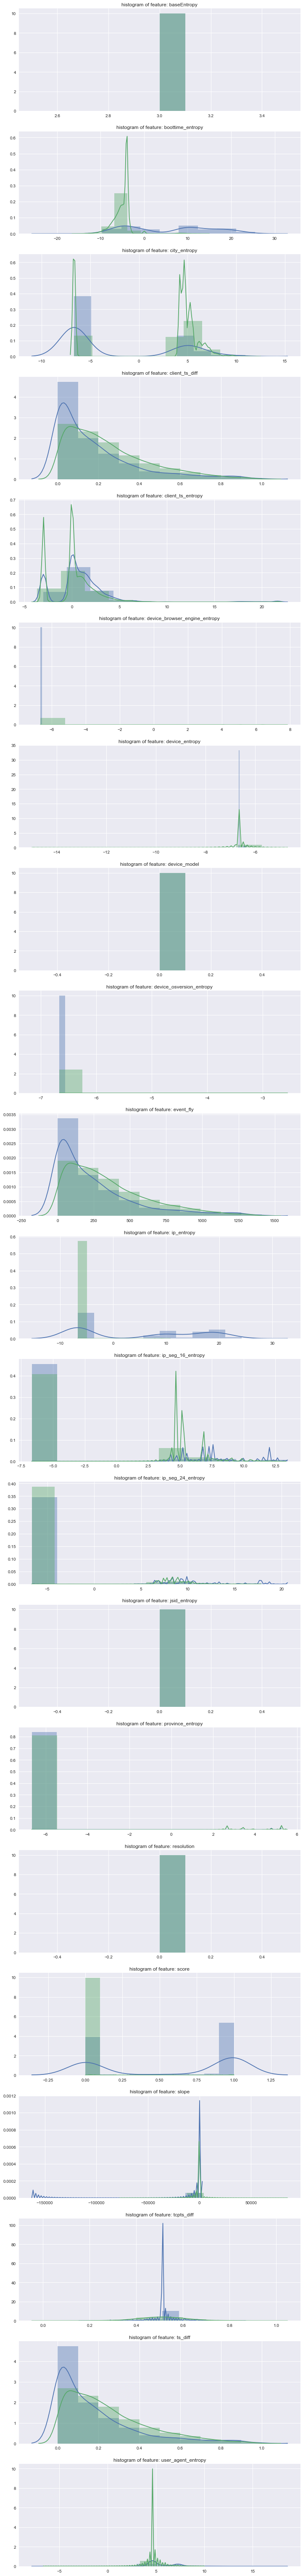

In [35]:
X = df_c[cols]
y = df_c.ix[:, df_c.columns == 'label']
v_features = cols
pic_nums = v_features.shape[0]
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(pic_nums, 1)
for i, cn in enumerate(df_c[v_features]):
    print("cn",cn)
    ax = plt.subplot(gs[i])
    sns.distplot(df_c[cn][df_c.label == 1], bins=10)
    sns.distplot(df_c[cn][df_c.label == 0], bins=10)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [36]:
drop_cols = ['baseEntropy','device_browser_engine_entropy',
              'device_model','jsid_entropy','resolution']

In [37]:
df_c = df_c.drop(drop_cols,axis=1)

In [38]:
df_c.columns

Index([        u'boottime_entropy',             u'city_entropy',
              u'client_ts_entropy',           u'device_entropy',
       u'device_osversion_entropy',                u'event_fly',
                     u'ip_entropy',        u'ip_seg_16_entropy',
              u'ip_seg_24_entropy',                    u'label',
               u'province_entropy',                    u'score',
                          u'slope',       u'user_agent_entropy',
                 u'client_ts_diff',               u'tcpts_diff',
                        u'ts_diff'],
      dtype='object')

In [39]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ts_match = re.compile('^.*ts_diff$')
ts_amatch = np.vectorize(lambda x:bool(ts_match.match(x)))
ts_cols = df_c.columns.values[ts_amatch(df_c.columns.values)]
ts_df_c = df_c[ts_cols]
ts_no = df_c[df_c.columns.difference(ts_cols)]

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(ts_df_c)
ts_df_c = pd.DataFrame(X_scaled, columns = ts_df_c.columns)
df_c = pd.concat([ts_no, ts_df_c], axis=1)

In [40]:
def tick_font_new(ax=None,font_size=None,rotation=90):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
        tick.label.set_rotation(rotation)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(font_size)
        tick.label.set_rotation(0)
    return None

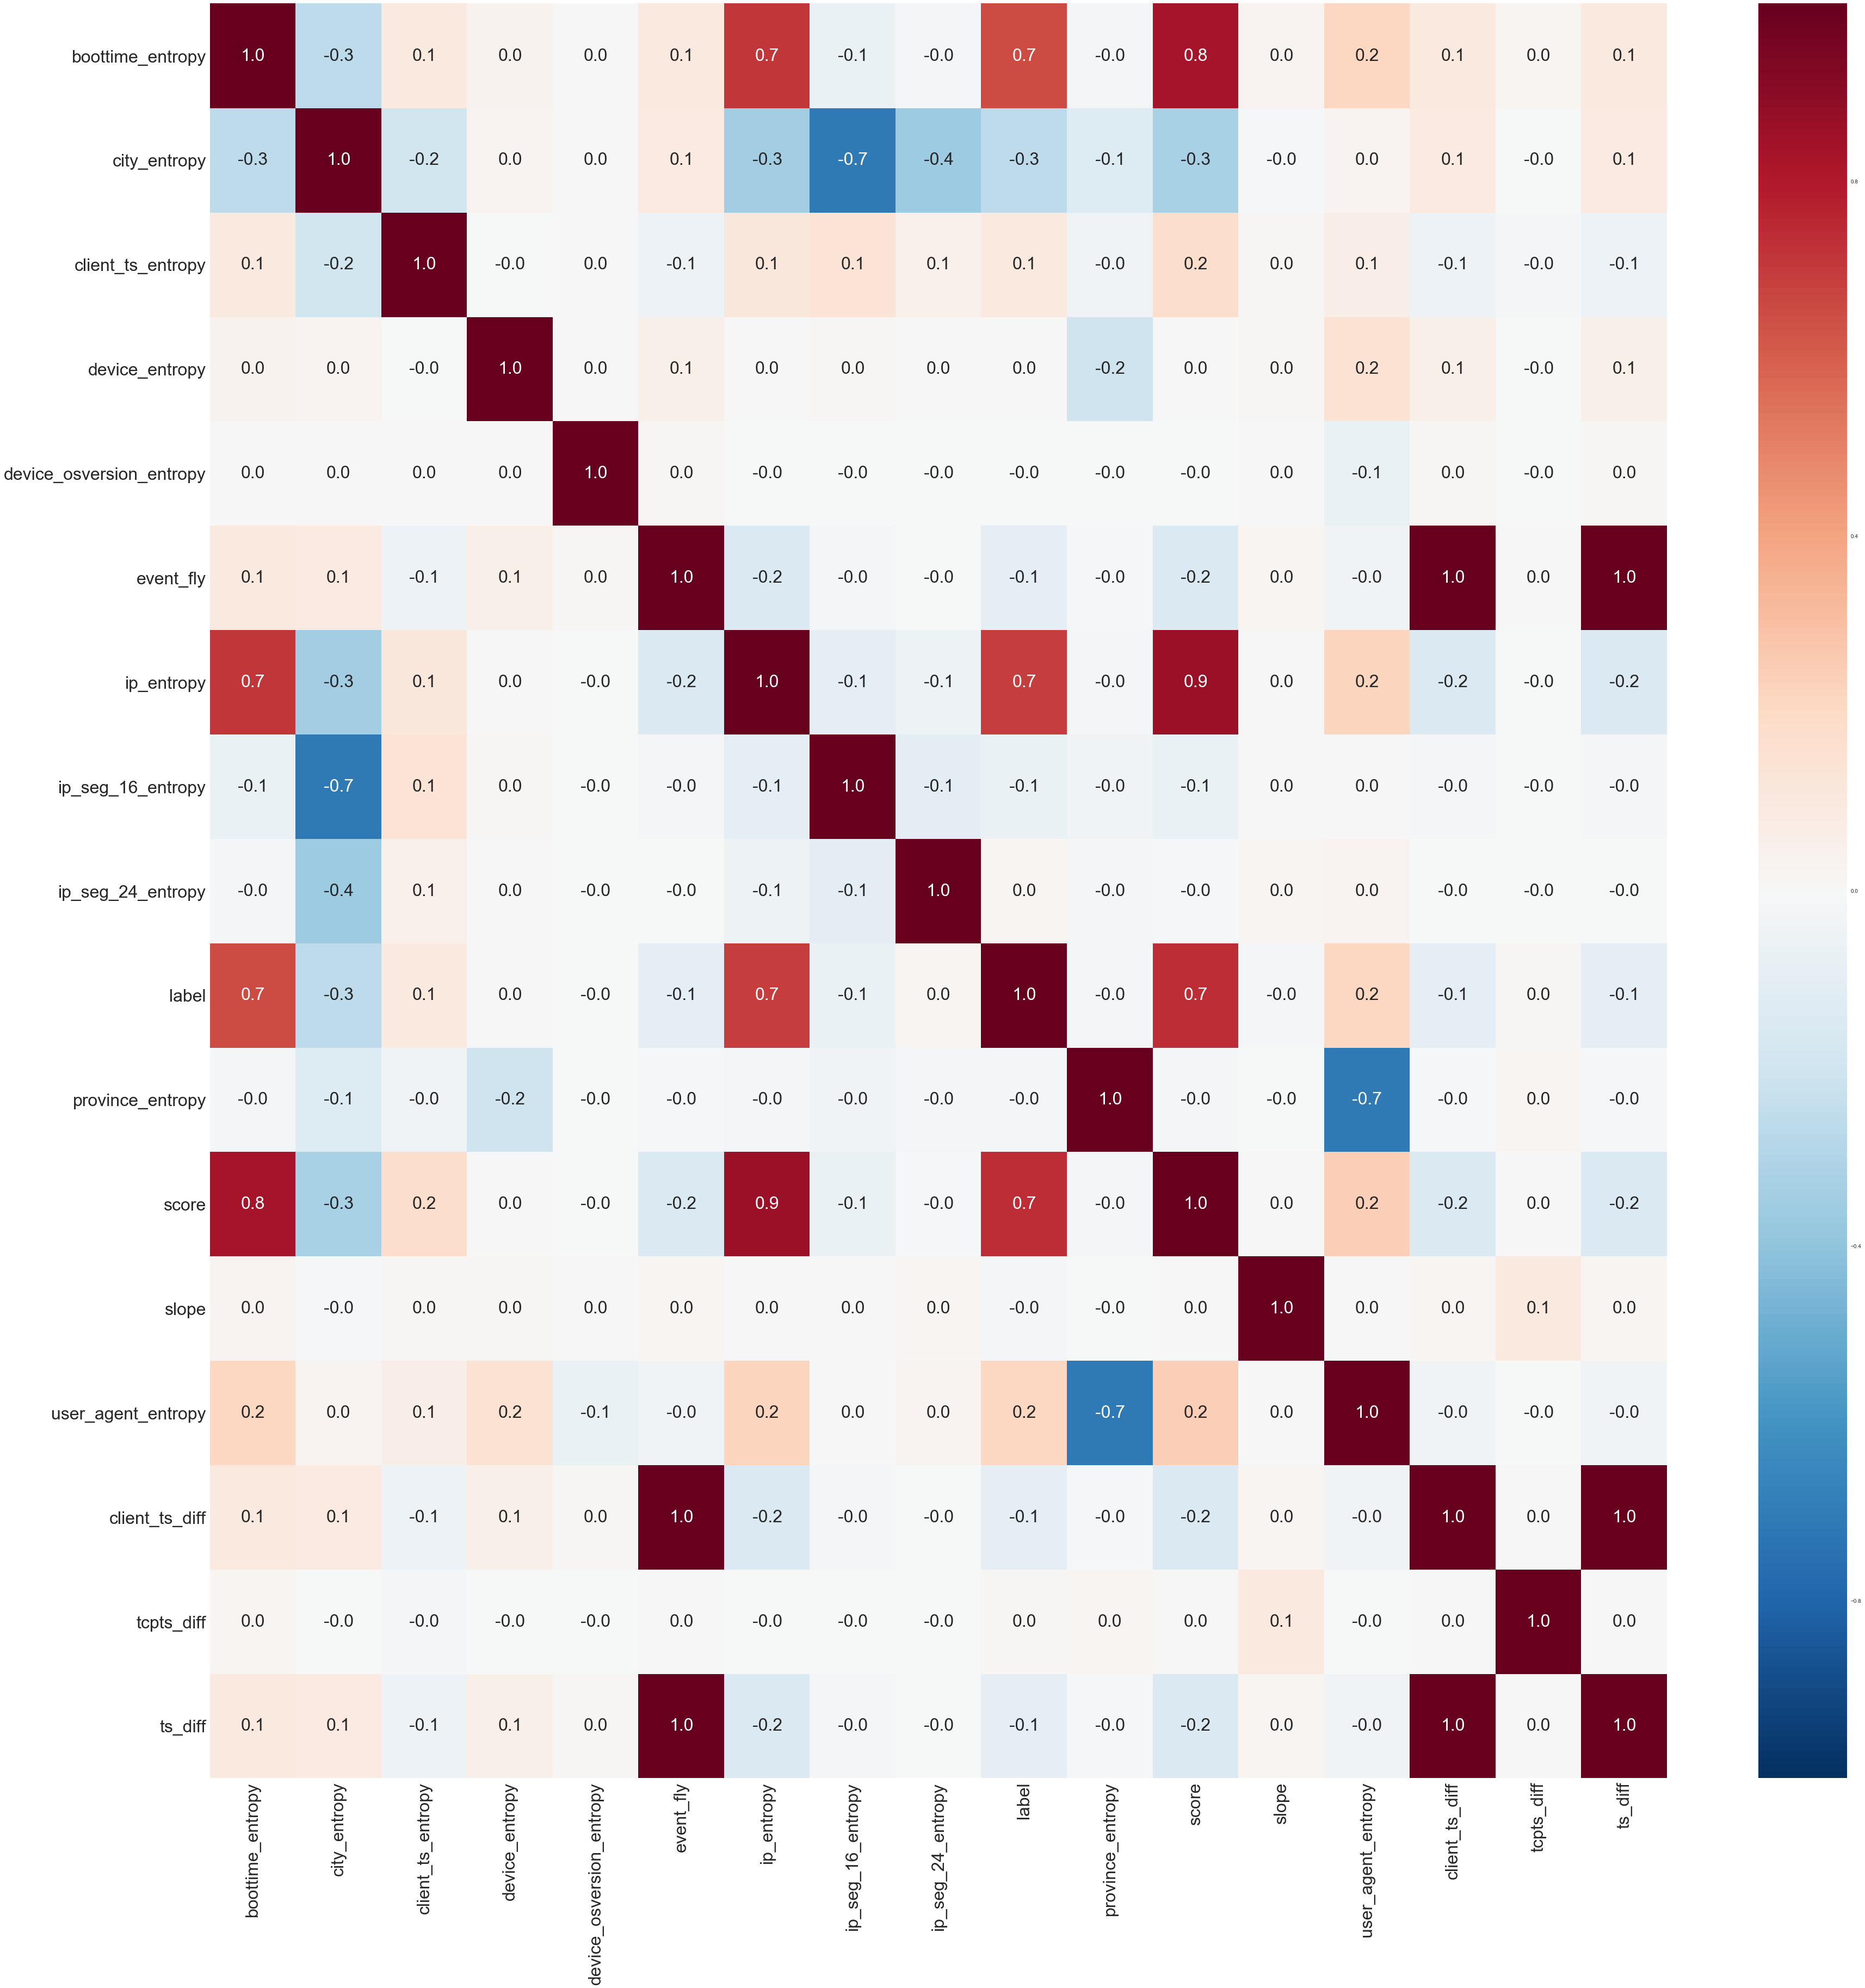

In [41]:
fig,ax= plt.subplots(figsize=(60,60))
sns.heatmap(df_c.corr(),ax=ax,annot=True,fmt='.1f',annot_kws={"size": 32})
tick_font(ax=ax,font_size=32,rotation_y=0)
plt.show()

In [42]:
df_c = df_c.drop(['ts_diff'],axis=1)

In [43]:
df_c.columns

Index([        u'boottime_entropy',             u'city_entropy',
              u'client_ts_entropy',           u'device_entropy',
       u'device_osversion_entropy',                u'event_fly',
                     u'ip_entropy',        u'ip_seg_16_entropy',
              u'ip_seg_24_entropy',                    u'label',
               u'province_entropy',                    u'score',
                          u'slope',       u'user_agent_entropy',
                 u'client_ts_diff',               u'tcpts_diff'],
      dtype='object')

In [44]:
df_c.shape

(14388, 16)

In [45]:
df_c_t.shape

(32464, 22)

('cn', 0, u'baseEntropy')
('cn', 1, u'boottime_entropy')
('cn', 2, u'city_entropy')
('cn', 3, u'client_ts_diff')
('cn', 4, u'client_ts_entropy')
('cn', 5, u'device_browser_engine_entropy')
('cn', 6, u'device_entropy')
('cn', 7, u'device_model')
('cn', 8, u'device_osversion_entropy')
('cn', 9, 'event_fly')
('cn', 10, u'ip_entropy')
('cn', 11, u'ip_seg_16_entropy')
('cn', 12, u'ip_seg_24_entropy')
('cn', 13, u'jsid_entropy')
('cn', 14, u'province_entropy')
('cn', 15, u'resolution')
('cn', 16, 'score')
('cn', 17, u'slope')
('cn', 18, u'tcpts_diff')
('cn', 19, u'ts_diff')
('cn', 20, u'user_agent_entropy')


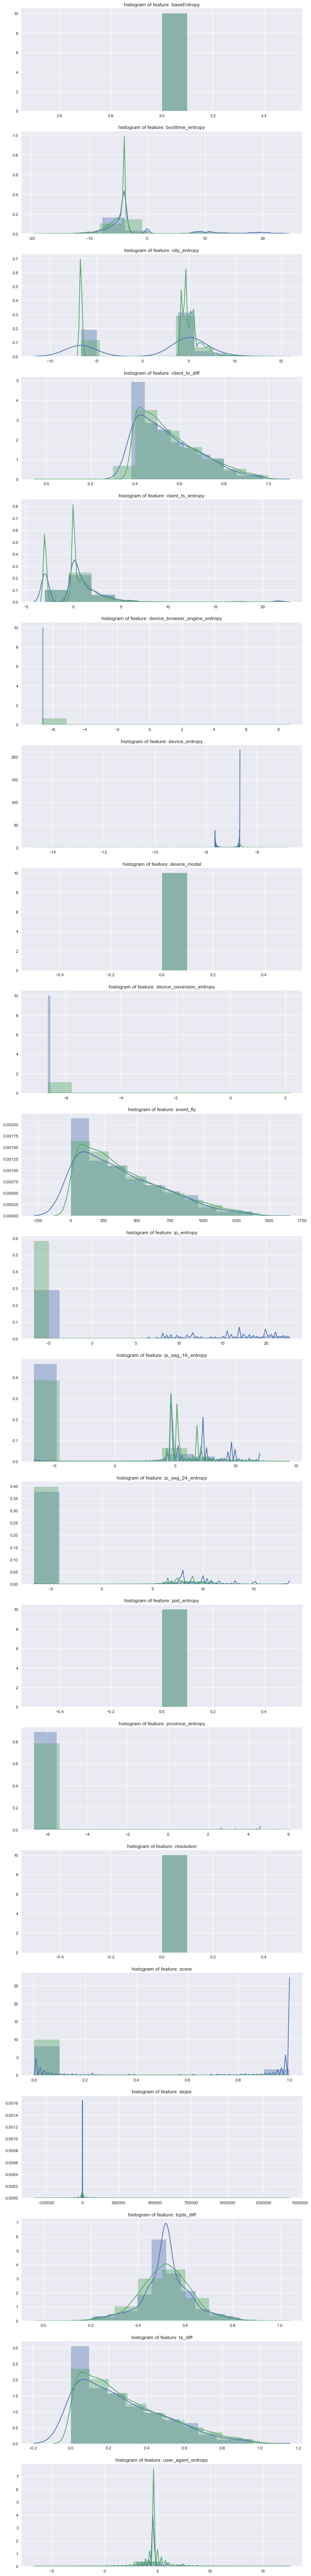

In [46]:
X = df_c_t[cols]
y = df_c_t.ix[:, df_c_t.columns == 'label']
v_features = cols
pic_nums = v_features.shape[0]
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(pic_nums, 1)
for i, cn in enumerate(df_c_t[v_features]):
    print("cn",i,cn)
    ax = plt.subplot(gs[i])
    sns.distplot(df_c_t[cn][df_c_t.label == 1], bins=10)
    sns.distplot(df_c_t[cn][df_c_t.label == 0], bins=10)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()